In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

### full_weather.csv 
- Contains main weather data from 1996-2023 July

### air_quality_indicators.csv 
- Info about air quality indicators

### air_quality_warnings.csv 
- Info about air quality warning levels

### uv_info 
- Info about uv indexes and their dangers

### full_locations.csv 
- Info about each location extracted

In [2]:
weather_data = pd.read_csv("full_weather.csv")
quality_data = pd.read_csv('air_quality_indicators.csv')
warning_data = pd.read_csv('air_quality_warning.csv')
uv_data = pd.read_csv('uv_info.csv')
location_data = pd.read_csv('full_locations.csv')

In [3]:
weather_data.head()

,datetime,place,city,state,temperature,pressure,dew_point,humidity,wind_speed,gust,wind_chill,uv_index,feels_like_temperature,visibility,solar_radiation,pollutant_value,precipitation_rate,precipitation_total
0,1996-08-09 13:30:00,Tanjung Aru,Kota Kinabalu,Sabah,32.0,1006.16,25.0,66.0,9.0,NaN,32.0,NaN,39.0,9.0,NaN,NaN,NaN,NaN
1,1996-08-09 13:30:00,Batu Maung,Bayan Lepas,Pulau Pinang,25.0,1008.64,24.0,94.0,4.0,NaN,25.0,NaN,25.0,6.0,NaN,NaN,NaN,NaN
2,1996-08-09 13:30:00,Sepang,Sepang,Kuala Lumpur,29.0,1006.97,23.0,70.0,2.0,NaN,29.0,NaN,32.0,9.0,NaN,NaN,NaN,NaN
3,1996-08-09 13:30:00,Kota Sentosa,Kuching,Sarawak,33.0,1003.78,24.0,59.0,NaN,NaN,33.0,NaN,39.0,9.0,NaN,NaN,NaN,NaN
4,1996-08-09 14:30:00,Sepang,Sepang,Kuala Lumpur,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN


In [4]:
weather_data.describe()

,temperature,pressure,dew_point,humidity,wind_speed,gust,wind_chill,uv_index,feels_like_temperature,visibility,solar_radiation,pollutant_value,precipitation_rate,precipitation_total
count,1.864748e+07,1.831501e+07,1.845771e+07,1.857622e+07,1.680595e+07,1.192378e+07,1.812810e+07,1.337759e+07,5.233436e+06,5.162533e+06,1.050483e+07,5.388228e+06,1.368293e+07,1.402143e+07
mean,2.763615e+01,1.008908e+03,2.428935e+01,8.293496e+01,3.406789e+00,3.242352e+00,2.761426e+01,1.416530e+00,3.058162e+01,8.572970e+00,1.501278e+02,4.367758e+01,5.679142e-01,4.628727e+00
std,3.344440e+00,1.194545e+01,2.072197e+00,1.498990e+01,5.069961e+00,5.503517e+00,3.353067e+00,2.604233e+00,5.202652e+00,1.236898e+00,2.562279e+02,1.802095e+01,2.259782e+01,4.269177e+01
min,2.000000e-01,8.500150e+02,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-01,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e+01,1.006850e+03,2.340000e+01,7.400000e+01,0.000000e+00,0.000000e+00,2.500000e+01,0.000000e+00,2.600000e+01,9.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00
50%,2.700000e+01,1.009640e+03,2.430000e+01,8.700000e+01,1.800000e+00,1.500000e+00,2.700000e+01,0.000000e+00,3.000000e+01,9.000000e+00,0.000000e+00,4.400000e+01,0.000000e+00,0.000000e+00
75%,3.000000e+01,1.012530e+03,2.530000e+01,9.400000e+01,6.000000e+00,4.600000e+00,3.000000e+01,2.000000e+00,3.500000e+01,9.000000e+00,1.938000e+02,5.500000e+01,0.000000e+00,5.100000e-01
max,4.190000e+01,1.089320e+03,4.200000e+01,1.000000e+02,1.722000e+03,5.930000e+02,4.490000e+01,2.000000e+01,4.400000e+01,1.600000e+01,1.230100e+04,7.460000e+02,4.046470e+03,9.892540e+03


In [5]:
quality_data.head()

,pollutant,symbol,meaning,unit
0,PM2.5,**,Particulate matter with diameter of less than ...,μg/m3
1,PM10,*,Particulate matter with diameter of less than ...,μg/m3
2,SO2,a,Sulphur Dioxide,ppm
3,NO2,b,Nitrogen Dioxide,ppm
4,O3,c,Ozone,ppm


In [6]:
warning_data.head()

,label,pollutant,warning_message,should_report
0,Good,PM2.5,No health effects reported,False
1,Good,PM10,No health effects reported,False
2,Good,CO2,No health effects reported,False
3,Good,CO,No health effects reported,False
4,Good,SO2,No health effects reported,False


In [7]:
uv_data.head()

,uv_level,exposure_category,short_description,long_description
0,2,low,no protection required,No damage is expected. You can safely stay out...
1,5,moderate,protection required,Some precaution needed for people with sensiti...
2,7,high,protection required,Some precaution needed for people with sensiti...
3,10,very high,extra protection,Avoid unnecessary exposure especially during m...
4,20,extreme,extra protection,Avoid unnecessary exposure especially during m...


In [8]:
location_data.head()

,identifying_location,place,city,state,latitude,longitude,ICAO,PWStation
0,Muar,Taman Sungai Abong,Muar,Johor,2.063100,102.584900,NaN,NaN
1,Jalan Muar-Pagoh,Pagoh,Muar,Johor,2.139035,102.739549,NaN,IPAGOH1
2,Senai International Airport,Bandar Putra Kulai,Kulai,Johor,1.640556,103.670278,WMKJ,NaN
3,Kampung Baru Kulai,Taman Kulai Besar,Kulai,Johor,1.654704,103.602386,NaN,IKULAI5
4,Kluang,Kluang,Kluang,Johor,2.037882,103.312063,NaN,NaN


In [9]:
weather_size = weather_data.shape[0]
print(f'weather_data: {weather_size} rows')

quality_size = quality_data.shape[0]
print(f'weather_data: {quality_size} rows')

warning_size = warning_data.shape[0]
print(f'warning_data: {warning_size} rows')

uv_size = uv_data.shape[0]
print(f'uv_data: {uv_size} rows')

location_size = location_data.shape[0]
print(f'location_data: {location_size} rows')

weather_data: 24519715 rows
weather_data: 8 rows
warning_data: 54 rows
uv_data: 5 rows
location_data: 177 rows


In [10]:
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
data_2024 = weather_data[
    (weather_data['datetime'].dt.year == 2024) 
    & 
    (weather_data['state'] == 'Kuala Lumpur')
    &
    (weather_data['city'] == 'Kuala Lumpur')
    &
    (weather_data['place'] == 'Bukit Bintang')
]
data_2024_sorted = data_2024.sort_values(by='datetime')
data_2024_sorted = data_2024_sorted.reset_index(drop=True)


In [11]:
data_2024_sorted.head(5)

,datetime,place,city,state,temperature,pressure,dew_point,humidity,wind_speed,gust,wind_chill,uv_index,feels_like_temperature,visibility,solar_radiation,pollutant_value,precipitation_rate,precipitation_total
0,2024-01-01 00:04:54,Bukit Bintang,Kuala Lumpur,Kuala Lumpur,26.7,NaN,24.4,87.0,0.3,0.9,26.7,0.0,NaN,NaN,21.2,NaN,0.0,0.0
1,2024-01-01 00:09:54,Bukit Bintang,Kuala Lumpur,Kuala Lumpur,26.7,NaN,24.4,87.0,0.1,0.2,26.7,0.0,NaN,NaN,25.6,NaN,0.0,0.0
2,2024-01-01 00:14:54,Bukit Bintang,Kuala Lumpur,Kuala Lumpur,26.9,NaN,24.4,86.0,0.0,0.0,26.9,0.0,NaN,NaN,28.6,NaN,0.0,0.0
3,2024-01-01 00:19:53,Bukit Bintang,Kuala Lumpur,Kuala Lumpur,27.0,NaN,24.5,86.0,0.5,1.1,27.0,0.0,NaN,NaN,31.6,NaN,0.0,0.0
4,2024-01-01 00:24:53,Bukit Bintang,Kuala Lumpur,Kuala Lumpur,27.2,NaN,24.5,85.3,0.7,1.2,27.2,0.0,NaN,NaN,29.9,NaN,0.0,0.0


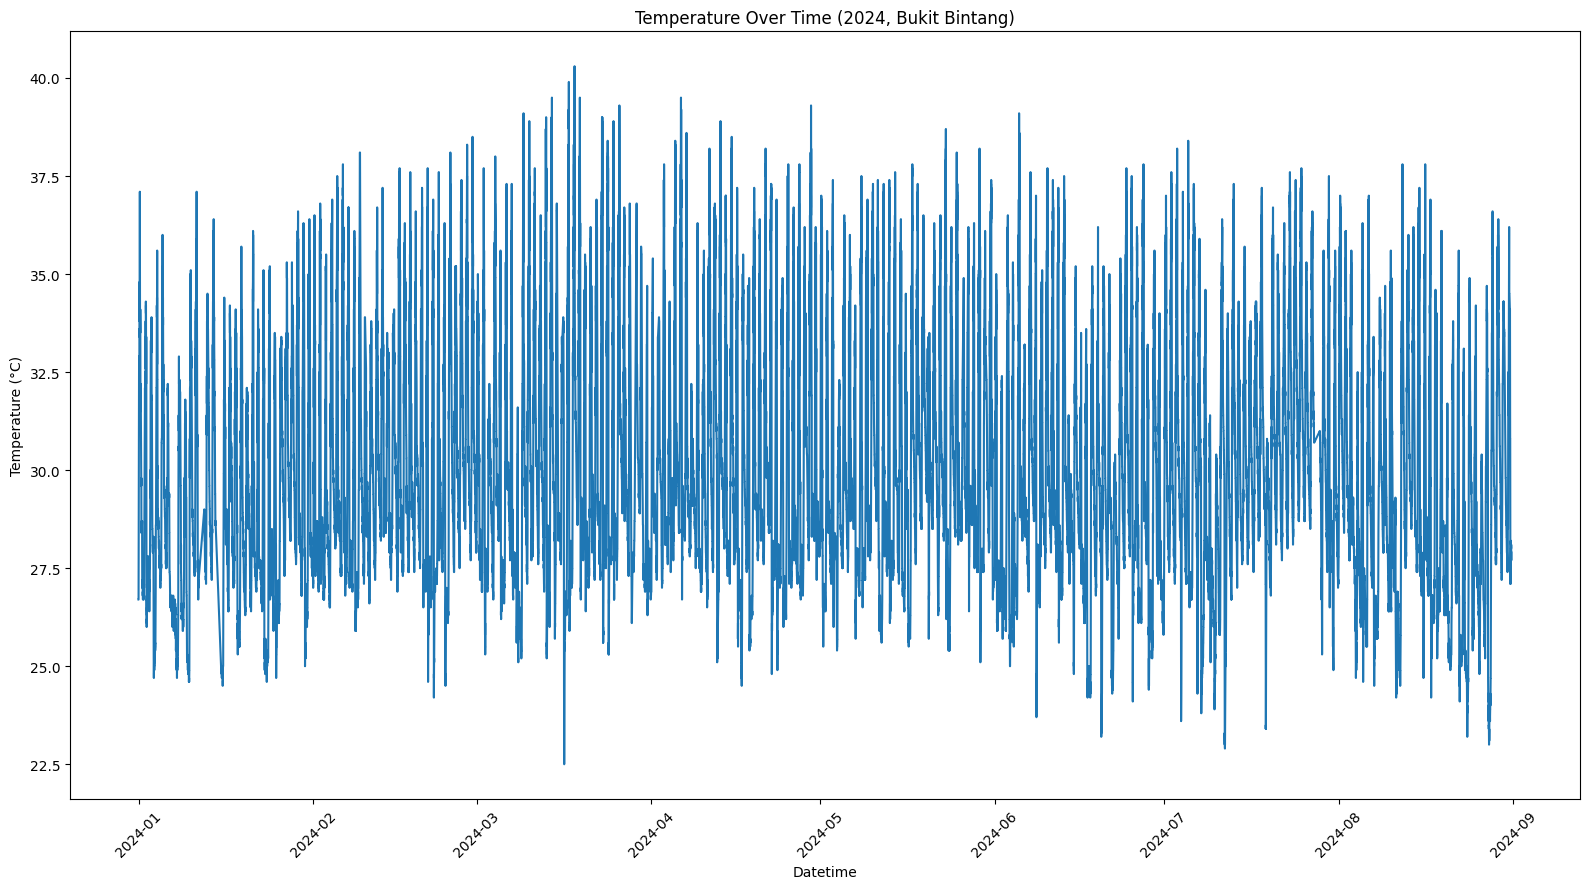

In [12]:
# Temperature Over Time (2024, Bukit Bintang)
plt.figure(figsize=(16, 9))
sns.lineplot(x=data_2024_sorted['datetime'], y=data_2024_sorted['temperature'])
plt.title("Temperature Over Time (2024, Bukit Bintang)")
plt.xlabel("Datetime")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Mark as truly raining only if above threshold
rain_threshold = 0.5  # mm
data_2024_sorted['is_rainy'] = data_2024_sorted['precipitation_total'] >= rain_threshold


In [22]:
def rain_category(rate):
    if rate < 0.5:
        return "None/Light"
    elif rate < 2.5:
        return "Light"
    elif rate < 7.6:
        return "Moderate"
    else:
        return "Heavy"

data_2024_sorted['rain_category'] = data_2024_sorted['precipitation_rate'].apply(rain_category)


In [36]:
daily_max_precip = data_2024_sorted.groupby('datetime')['precipitation_rate'].max()
daily_rainy = daily_max_precip[daily_max_precip >= rain_threshold]
fields = ['datetime','precipitation_rate', 'precipitation_total', 'is_rainy', 'rain_category']
print(data_2024_sorted['rain_category'].unique())

['None/Light' 'Light' 'Moderate' 'Heavy']


In [39]:
# Create a new column with hour resolution
data_2024_sorted['hour'] = data_2024_sorted['datetime'].dt.floor('H')

hourly_precip = data_2024_sorted.groupby('hour').agg({
    'precipitation_total': 'sum',  # total rainfall in that hour
    'precipitation_rate': 'max'    # max rainfall rate in that hour
}).reset_index()

rain_threshold = 0.5  # mm
hourly_precip['is_rainy'] = hourly_precip['precipitation_total'] >= rain_threshold

def rain_category(rate):
    if rate < 0.5:
        return "No rain"
    elif rate < 2.5:
        return "Light"
    elif rate < 7.6:
        return "Moderate"
    else:
        return "Heavy"

hourly_precip['rain_category'] = hourly_precip['precipitation_rate'].apply(rain_category)



C:\Users\Owner\AppData\Local\Temp\ipykernel_9268\564871357.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_2024_sorted['hour'] = data_2024_sorted['datetime'].dt.floor('H')


C:\Users\Owner\AppData\Local\Temp\ipykernel_9268\4222378199.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rain_counts.index, y=rain_counts.values, palette="Blues_d")


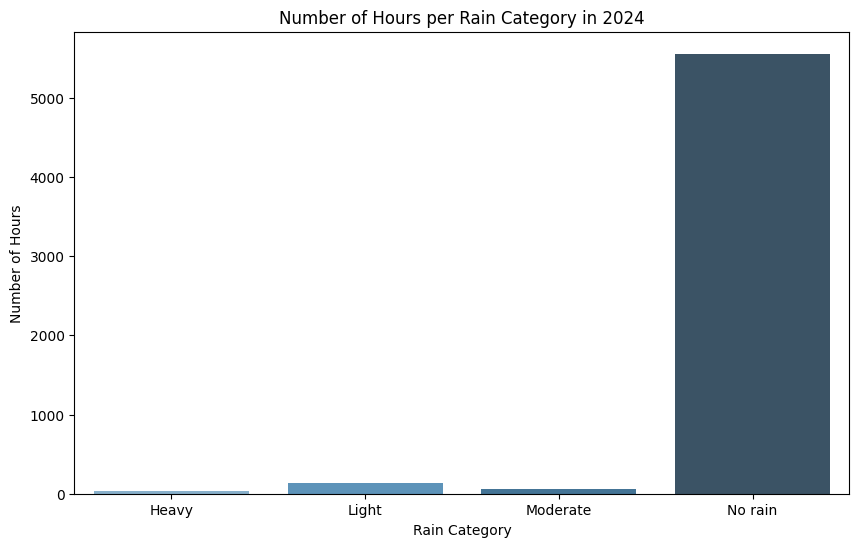

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of hours per rain category
rain_counts = hourly_precip['rain_category'].value_counts().sort_index()

# Barplot using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=rain_counts.index, y=rain_counts.values, palette="Blues_d")
plt.title("Number of Hours per Rain Category in 2024")
plt.xlabel("Rain Category")
plt.ylabel("Number of Hours")
plt.show()


133


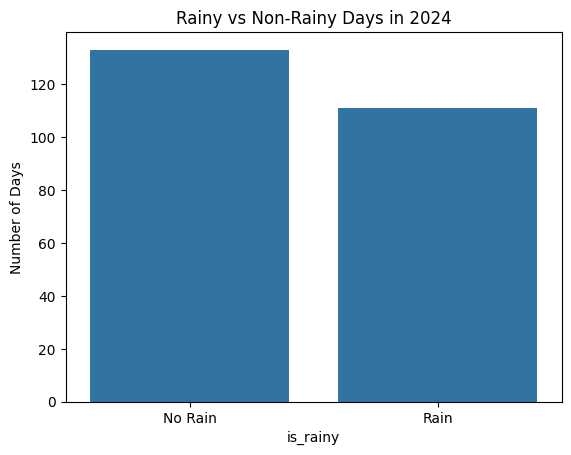

In [48]:
# First, extract the date from the datetime/hour column
hourly_precip['date'] = hourly_precip['hour'].dt.date

# Group by date and sum total precipitation
daily_precip = hourly_precip.groupby('date')['precipitation_total'].sum().reset_index()

# Determine if each day is rainy (any precipitation above threshold)
rain_threshold = 0.5  # mm, adjust if needed
daily_precip['is_rainy'] = daily_precip['precipitation_total'] >= rain_threshold

print(daily_precip[~daily_precip['is_rainy']].shape[0])

sns.countplot(x='is_rainy', data=daily_precip)
plt.xticks([0,1], ['No Rain', 'Rain'])
plt.ylabel("Number of Days")
plt.title("Rainy vs Non-Rainy Days in 2024")
plt.show()
